# Wichtig: 

in der Vorlesung besprochen!  

* Diese Aufgabe wird als Team Projekt bewertet. (max. 3 Teilnehmer) 
* Die hier erreichten Punkte gehen zu 20% in Klausur-Bewertung ein.

## Teilnehmer

* Geben Sie hier im Dokument die Namen der Teilnehmer an! 

Teilnehmer: 
* Sebastian Trauth
* Henrik Kaltenbach
* Marlene Hill

### Abgabe

* Die Abgabe erfolgt über Moodle

* Abzugeben ist ein jupyter Notebook mit
    * Text, der beschreibt was und wieso sie die einzelnen Analyse-Schritte durchführen 
    * Pythoncode, der die einzelnen Schritte durchführt
    * eine Zusammenfassung am Ende



* Sie können neue Zellen mit Hilfe der Jupyter-Icons hinzufügen
    * Sie können zwischen Markdown oder Code wählen 

* Export des Jupyter Notebooks
    * save as --> ipynb

* Das Jupyter Notebook zur Deadline in Moodle hochladen! 
    * der Name des JupyterNotebooks enthält auch die Namen der Teilnehmer

### Kriterien

* Sind die einzelnen Schritte gut dokumentiert und begründet? 

* Sind die bekannten in der Vorlesung vorgestellten Verfahren sinnvoll eingesetzt worden? 
    * Wurde begründet wieso ein Verfahren nicht weiter verfolgt wurde? 

* Wurde eine gute Klassifizierung erreicht? 


# Aufgabe zur Klassifizierung

Im Verzeichnis data-classification finden Sie Daten aus einem MicroCensus
* die Datei adult.data enthält Datenobjekte (zum Testen)
* die Datei adult.test enthält Datenobjekte (zum Testen)
* die Datei adult.names enthält Beschreibungen zu den Daten

## Aufgaben 

Entwickeln Sie ein Klassifizierungsmodell, dass so genau wie möglich vorhersagt, ob eine Person ein Einkommen von mehr als 50000 Doller pro Jahr hat! 
* Verwenden Sie was sie bisher gelernt haben! 
* Seien Sie kritisch!

# ToDo

* Datei umbenennen bei Abgabe
* Alle müssen Datei abgeben

## Einlesen der Daten in eine Objekt-Liste

Es werden die Trainings- und die Testdaten in Objektlisten eingelesen. Ein klar definierter Seperator sorgt für das korrekte Parsen. Die erste Zeile in `adult.test` enthält keinen Daten, sie kann also direkt entfernt werden.
Die Trainingsdaten verfügen über 32561 Einträge, die Testdaten über 16281. Beide Datensätze bestehen aus 15 Merkmalen.

In [2]:
import pandas as pd

df = pd.read_csv('./data-classification/adult.data', sep=', ', engine='python', header=None, names=[
'age', 'workclass', 'fnlwgt', 
'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 
'sex' , 'capital-gain' , 'capital-loss',
'hours-per-week', 'native-country', "<50k"
])

tf = pd.read_csv('./data-classification/adult.test', sep=', ', engine='python', header=None, names=[
'age', 'workclass', 'fnlwgt', 
'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 
'sex' , 'capital-gain' , 'capital-loss',
'hours-per-week', 'native-country', "<50k"
])
tf.drop(index=0, inplace=True)  # Drop first line not containing any data

print("Train data: " + str(df.shape))
print("Test data: " + str(tf.shape))

df.head()

Trainingsdaten: (32561, 15)
Testdaten: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
tf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<50k
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Visualisieren der Daten

1. Zwischen "nominalen" (ohne innere Ordnung) und "ordinalen" (mit natürlicher Ordnung) Kategorien unterscheiden.
nominal: Blau, Rot, Grün
         Mann, Frau
         Bananen, Äpfel
         
ordinal: niedrig, mittel, hoch
         jung, alt
         
2. Es werden numerische Werte als Eingabe vorausgesetzt.
k-nächste-Nachbarn-Algorithmus berechnet Abstände zwischen Beobachtungen (oftmals euklidischer Abstand)

$\sqrt{\sum\nolimits_{n=1}^N (x_i - y_i)^2}$ 

3. String muss in numerisches Format gebracht werden

nominal: 
scikit-Bibliothek "LabelBinarizer -> One-Hot-Codierung

Pandas lässt sich auch auf die Transformierte anwenden

ordinal kategorisch: 
DataFrame-Methode "replace" von pandas um String-Bezeichner in numerische Äquivalente zu transformieren

4. Fehlende Klassenwerte imputieren

In einem kategorisches Merkmal fehlende Werte (unser "?") ersetzten durch vorhergesagte Werte.

Trainieren eines k-nächste-Nachbarn-(KNN)-Klassifikators um fehlende Werte vorherzusagen.


Idee: Grouped bar chart jeweils für <=50K und für >50K

Balkengruppe=Kriterium, so viele Balken wie mögliche Werte

<AxesSubplot:>

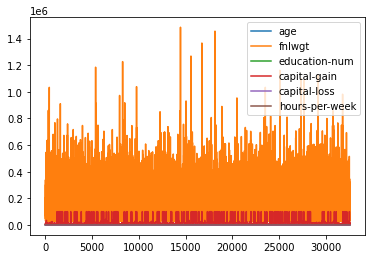

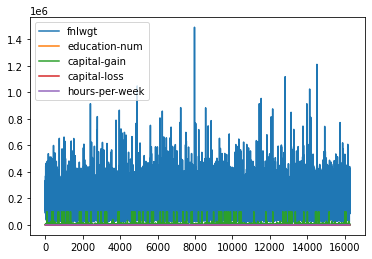

In [44]:
df.plot()
tf.plot()

## Vorbereitung der Dateien

Die Daten sind nicht direkt so nutzbar.
Sie enthalten einige Fehler die entfernt werden müssen.
Außerdem können die Merkmale in dem Format in dem sie vorliegen nicht verarbeitet werden und müssen verändert werden.
Diese Schritte werden hier beschrieben und umgesetzt.
Diese Schritte müssen auf die Test- wie auch auf die Trainingsdaten ausgeführt werden.

**1)

**2)

**3)

**4)

**5)

## Kategorisieren der Daten

## Datenvorbereitung

* fehlenden Daten
* Duplikate
* Unterschiedliche Datentypen
* Anpassung der Merkmale
(siehe VL4 Datenvorbereitung)

### Umgang mit fehlenden Daten

"?"

### Duplikate

Gibt es keine, siehe Code unten.

TODO: Begründen, warum nach Duplikaten suchen wichtig ist.

In [ ]:
# Auf Duplikate untersuchen
print(df.duplicated(keep=False))
print(tf.duplicated(keep=False))

### Unterschiedliche Datentypen

String in numerische Werte umwandeln

### Anpassung der Merkmale

Standardisierung

### Ausgewogene Klassen

Wenn nicht, müssen die Metriken verändert werden mit denen die Klassen bewertet werden.

### Textverarbeitung

Strings bereinigen --> strip, replace, split

Whitepaces entfernen etc., Satzzeichen, "-"

Soll Text in Tokens zerlegt werden? Einzelne Wörter?

## Test

Einfaches Perceptron auf alle Kriterien trainieren lassen

In [ ]:
Hier ist ja vorgegeben, dass es sich um ein Perceptron handeln soll.